In [ ]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Rescaling



from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")



In [ ]:
def count_images_in_class_directories(data_dir):
    class_counts = {}

    # List all the subdirectories (class directories) in the data directory
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            # List all files in the directory
            num_files = len(os.listdir(class_path))
            class_counts[class_dir] = num_files

    return class_counts

# Count images in training directory
train_class_counts = count_images_in_class_directories(data_dir_train)

def find_class_with_least_samples(class_counts):
    min_class = min(class_counts, key=class_counts.get)
    return min_class, class_counts[min_class]

least_class, least_count = find_class_with_least_samples(train_class_counts)

print(f"Class with the least number of samples: {least_class}, Number of samples: {least_count}")

def calculate_class_proportions(class_counts):
    total_samples = sum(class_counts.values())
    class_proportions = {cls: count / total_samples for cls, count in class_counts.items()}
    return class_proportions

# Calculate class proportions
class_proportions = calculate_class_proportions(train_class_counts)

# Find the dominant classes (those with the largest proportions)
dominant_classes = sorted(class_proportions.items(), key=lambda x: x[1], reverse=True)

print("Classes dominating the dataset proportionally (largest to smallest):")
for cls, proportion in dominant_classes:
    print(f"Class: {cls}, Proportion: {proportion:.4f}")



Class with the least number of samples: seborrheic keratosis, Number of samples: 77
Classes dominating the dataset proportionally (largest to smallest):
Class: pigmented benign keratosis, Proportion: 0.2063
Class: melanoma, Proportion: 0.1956
Class: basal cell carcinoma, Proportion: 0.1679
Class: nevus, Proportion: 0.1594
Class: squamous cell carcinoma, Proportion: 0.0808
Class: vascular lesion, Proportion: 0.0621
Class: actinic keratosis, Proportion: 0.0509
Class: dermatofibroma, Proportion: 0.0424
Class: seborrheic keratosis, Proportion: 0.0344


This is the best model I could get with Augmentor, rotating the images randomly and generating 500 images for each of 9 classes.
CNN model has 3 hidden layers with one fully connected layer and 2 dropouts of 0.5 and 0.25 each. Every hidden layer has a Maxpooling of size (2,2)
Optimizer = Adam
activation = Relu

one Flatten ()
and Softmax

Total parameters = 6,648,137
Epochs = 30

Val Accuracy: 77%

Test Accuracy: 43%




In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
import os



# Create a new directory for augmented images
os.makedirs(augmented_dir, exist_ok=True)

def augment_class(class_name, class_path, augmented_class_path):
    p = Augmentor.Pipeline(class_path, output_directory=augmented_class_path)

    # Example augmentations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #p.flip_left_right(probability=0.5)
    #p.flip_top_bottom(probability=0.5)
    #p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
    #p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    #p.random_color(probability=0.5, min_factor=0.7, max_factor=1.3)
    #p.zoom_random(probability=0.5, percentage_area=0.8)

    # Define the number of images to be generated
    p.sample(500)  # Adjust this number based on the class you are augmenting

# List all the subdirectories (class directories) in the data directory
for class_dir in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_dir)
    if os.path.isdir(class_path):
        # Create a new directory for the augmented class
        augmented_class_path = os.path.join(augmented_dir, class_dir)
        os.makedirs(augmented_class_path, exist_ok=True)

        # Augment the images for this class
        augment_class(class_dir, class_path, augmented_class_path)

print("\n Augmentation complete.")

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D1E952328F0>: 100%|██████████| 500/500 [00:35<00:00, 13.96 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D1E85486D70>: 100%|██████████| 500/500 [00:26<00:00, 19.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/dermatofibroma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D1E8F7BE680>: 100%|██████████| 500/500 [00:27<00:00, 18.09 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1936x1936 at 0x7D1E8F18A200>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7D1E854D4A00>: 100%|██████████| 500/500 [01:42<00:00,  4.86 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/pigmented benign keratosis.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D1E854EAFE0>: 100%|██████████| 500/500 [00:25<00:00, 19.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D1E85453C70>: 100%|██████████| 500/500 [00:51<00:00,  9.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D1E95251510>: 100%|██████████| 500/500 [00:31<00:00, 15.86 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D1E85450190>: 100%|██████████| 500/500 [00:26<00:00, 18.67 Samples/s]


 Augmentation complete.


In [ ]:
#Count total number of image generated by Augmentor.
a=pathlib.Path('/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/')
image_count_train = len(list(a.glob('**/*.jpg')))-len(list(data_dir_test.glob('**/*.jpg')))
print(image_count_train)

6739


In [ ]:
#Parameters
batch_size = 32
img_height = 180
img_width = 180
epochs=30

In [ ]:
#Load and preprocess data
augmented_dir = "/content/drive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Augmented/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

# List out all the classes of skin cancer and store them in a list.
class_names = train_ds.class_names # Extract class names before prefetching
print(class_names)
aug_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)
combined_ds = train_ds.concatenate(aug_ds)

# You don't need to use image_dataset_from_directory again for validation set.
# Just take a portion of combined_ds as validation set
val_ds = combined_ds.take(int(len(combined_ds) * 0.2)) # Take 20% of combined_ds as validation
train_ds = combined_ds.skip(int(len(combined_ds) * 0.2)) # Use the remaining 80% for training

test_ds=tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,

  image_size=(img_height, img_width),
)





#prefetching data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Found 118 files belonging to 9 classes.


# to show one o the images of all 9 classes
plt.figure(figsize=(15, 15))

for i, class_name in enumerate(class_names):
    plt.subplot(3, 3, i + 1)

    # Select one image from the dataset
    class_ds = train_ds.unbatch().filter(lambda img, lbl: lbl == i).batch(1) # Unbatch before filtering, then re-batch
    img, lbl = next(iter(class_ds))

    # Display the image
    plt.imshow(img[0].numpy().astype("uint8"))
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [ ]:
#Creating Model


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    #1st convolution layer
    Conv2D(32, (3,3), input_shape=(img_height, img_width, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D(2,2),

    #2nd convolution layer
    Conv2D(64, (3,3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D(2,2),

    #3rd convolution layer
    Conv2D(128, (3,3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D(2,2),

    #Dropout layer
    Dropout(0.5),

    #Flatten Layer
    #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
    Flatten(),

    #Dense Layer
    Dense(128, activation='relu'),


    #Dropout layer with 25% Fraction of the input units to drop.
    Dropout(0.25),

    #Dense Layer with softmax activation function.
    #Softmax is an activation function that scales numbers/logits into probabilities.
    Dense(len(class_names), activation='softmax')

])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

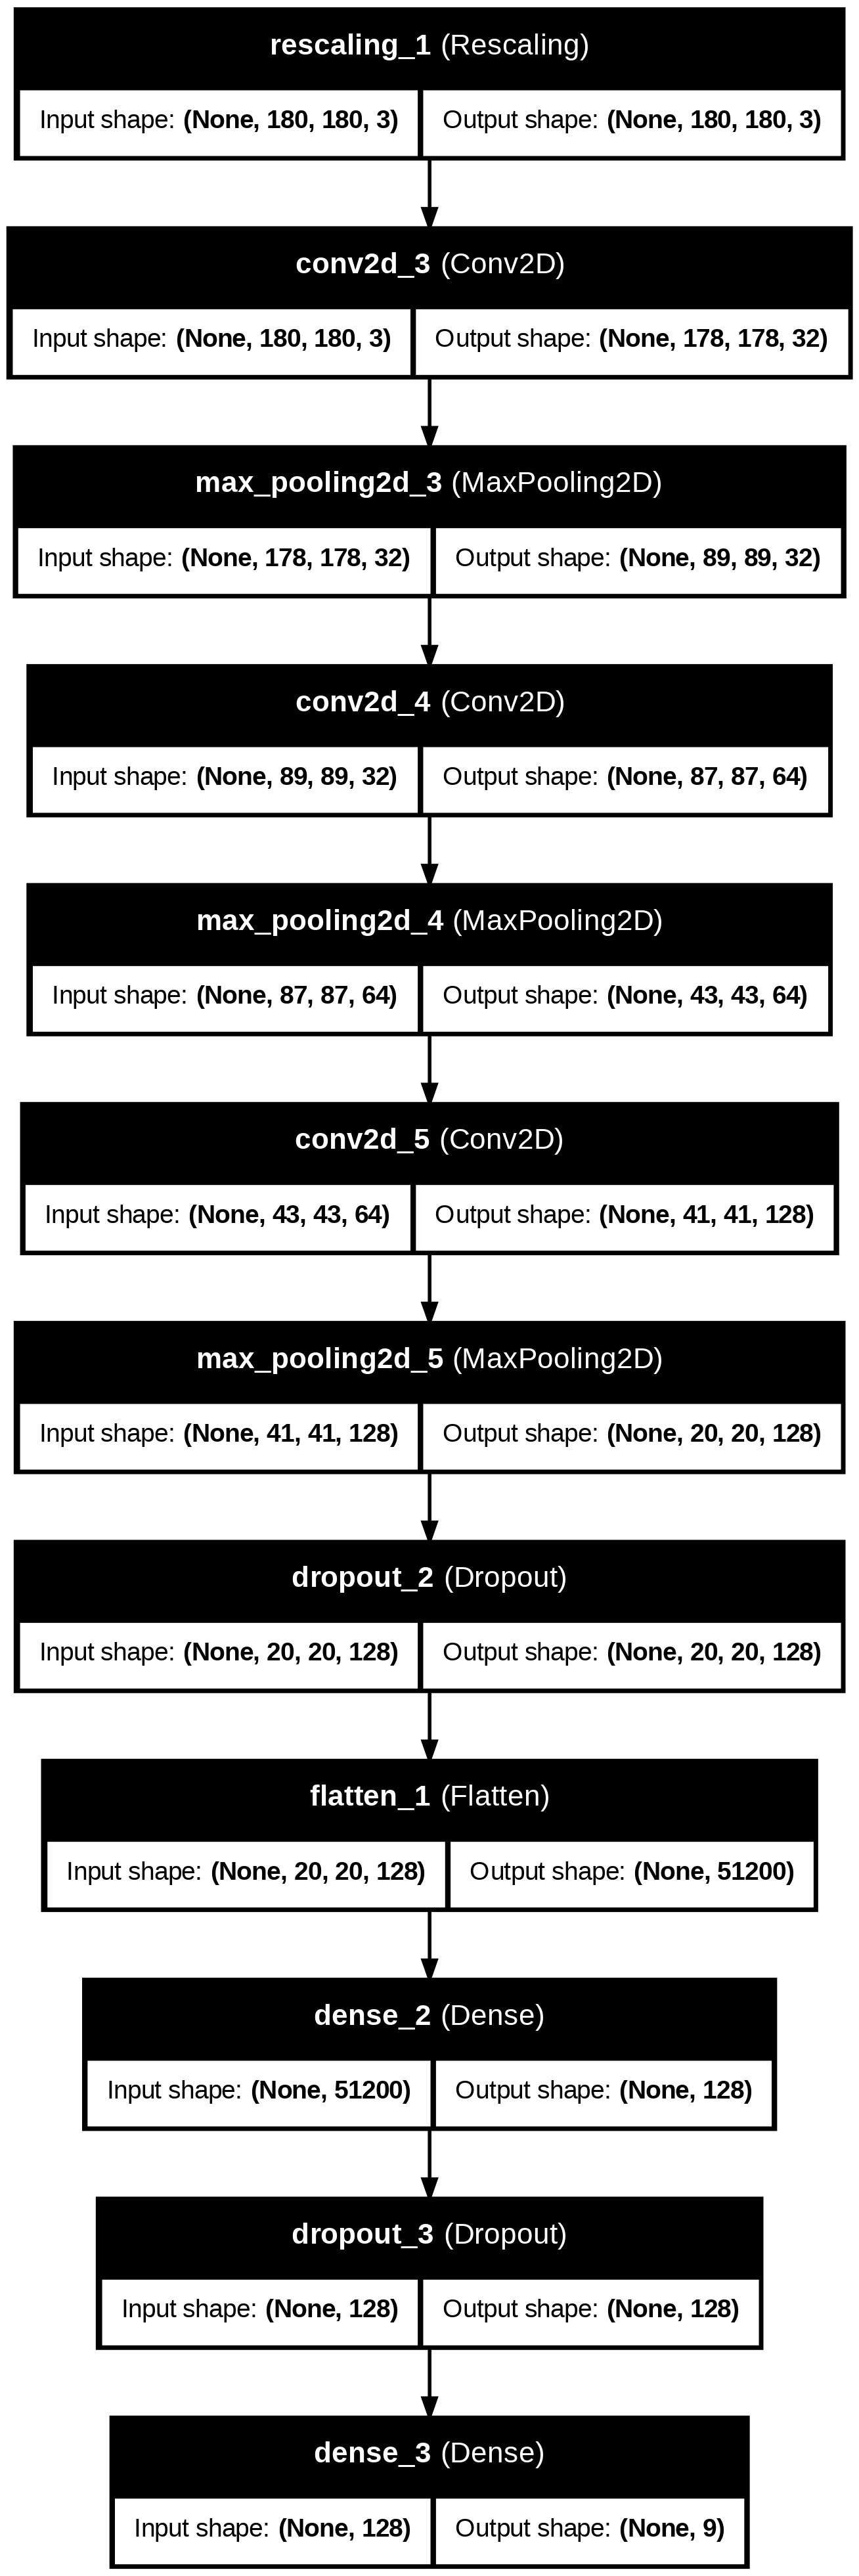

In [ ]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Step 4: Compile the Model
#Define the loss function, optimizer, and evaluation metrics.

In [ ]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

#Import the necessary module
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [ ]:
# Step 5: Train the Model
#Fit the model to the training data using the fit method.

In [26]:
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint,earlystop]
)


Epoch 1/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1833 - loss: 2.0877
Epoch 1: val_accuracy improved from -inf to 0.44223, saving model to model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.1839 - loss: 2.0862 - val_accuracy: 0.4422 - val_loss: 1.5741
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3950 - loss: 1.6017
Epoch 2: val_accuracy did not improve from 0.44223
136/136 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.3951 - loss: 1.6014 - val_accuracy: 0.4422 - val_loss: 1.4914
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4802 - loss: 1.3908
Epoch 3: val_accuracy improved from 0.44223 to 0.53693, saving model to model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.4802 - loss: 1.3907 - val_accuracy: 0.5369 - val_loss: 1.3137
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5300 - loss: 1.2539
Epoch 4: val_accuracy improved from 0.53693 to 0.57481, saving model to model.keras
136/13

In [28]:
#Step 6: Evaluate the Model
#Evaluate the model's performance on the validation data.

loaded_model = tf.keras.models.load_model('model.keras')
# Display the model summary
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,944,413 (76.08 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,296,276 (50.72 MB)

In [30]:
def preprocess_test_data(image, label):
  # Assuming 9 classes
  one_hot_label = tf.keras.utils.to_categorical(label, num_classes=9)
  return image, one_hot_label

test_ds = test_ds.map(preprocess_test_data)

# Evaluate the model on the modified test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - accuracy: 0.4374 - loss: 4.2032
Test accuracy: 0.40


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Actual Class actinic keratosis
Predictive Class nevus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual Class basal cell carcinoma
Predictive Class pigmented benign keratosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Actual Class dermatofibroma
Predictive Class dermatofibroma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Actual Class melanoma
Predictive Class nevus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Actual Class nevus
Predictive Class nevus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Actual Class seborrheic keratosis
Predictive Class seborrheic keratosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Actual Class squamous cell carcinoma
Predictive Class basal cell carcinoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Actual Class vascular lesion
Predictive Class vascular lesion


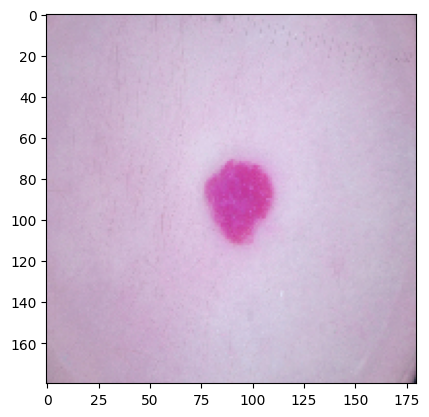

In [47]:

from tensorflow.keras.utils import load_img  # Import load_img

for i in range(0, 9):
  Test_image_path = os.path.join(data_dir_test, class_names[i], '*')
  Test_image = glob(Test_image_path)
  Test_image = load_img(Test_image[-1],target_size=(180,180,3))
  plt.imshow(Test_image)
  plt.grid(False)

  img = np.expand_dims(Test_image,axis=0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  pred_class = class_names[pred]
  print("Actual Class "+ class_names[i] +'\n'+ "Predictive Class "+pred_class )

In [ ]:
#Visualizing training results

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

Test accuracy is very less. and there is a trace of overfitting

In [ ]:
#Model 2

In [ ]:
#model with data augmentation

In [ ]:
data_augmentation = models.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    #tf.keras.layers.RandomContrast(0.2),
    #tf.keras.layers.RandomBrightness(0.2)

])



# Visualize data augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
#Build the CNN Model

In [ ]:
num_classes = len(class_names)

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    Conv2D(32, (3,3), input_shape=(img_height, img_width, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (5,5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),



    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(len(class_names), activation='softmax')

])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_11 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 87, 87, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 39, 39, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 39, 39, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 23104)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       2,957,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,020,521 (11.52 MB)

 Trainable params: 3,020,265 (11.52 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
#Compile the Model
#Define the loss function, optimizer, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Train the Model
#Fit the model to the training data using the fit method.

In [ ]:
history=model.fit(
    train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.2785 - loss: 5.5004 - val_accuracy: 0.0872 - val_loss: 14.5015
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.3200 - loss: 2.5749 - val_accuracy: 0.1902 - val_loss: 11.3192
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.3698 - loss: 1.9823 - val_accuracy: 0.0895 - val_loss: 10.4164
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.3824 - loss: 1.7837 - val_accuracy: 0.1253 - val_loss: 7.4046
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4183 - loss: 1.6827 - val_accuracy: 0.1767 - val_loss: 10.0172
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.4437 - loss: 1.6414 - val_accuracy: 0.2282 - val_loss: 4.9712
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4661 - loss: 1.5663 - val_accuracy: 0.2081 - val_loss: 3.5221
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.4504 - loss: 1.5739 - val_accuracy: 0.2841

In [ ]:
#Step 6: Evaluate the Model
#Evaluate the model's performance on the validation data.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3059 - loss: 3.3196
Test accuracy: 0.32


In [ ]:
#Model 3
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    Conv2D(32, (3,3), input_shape=(img_height, img_width, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(len(class_names), activation='softmax')

])

model.summary()

In [ ]:
#Compile the Model
#Define the loss function, optimizer, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Train the Model
#Fit the model to the training data using the fit method.

In [ ]:
history=model.fit(
    train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.1507 - loss: 8.1082 - val_accuracy: 0.0872 - val_loss: 16.7875
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.1609 - loss: 7.0353 - val_accuracy: 0.1924 - val_loss: 7.9259
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.1465 - loss: 4.0501 - val_accuracy: 0.0403 - val_loss: 3.4021
Epoch 4/20
10/56 ━━━━━━━━━━━━━━━━━━━━ 2:25 3s/step - accuracy: 0.1298 - loss: 2.8002

KeyboardInterrupt: 